<figure>
<center>
<img width=50% src='https://pandas.pydata.org/docs/_static/pandas.svg' />
<figcaption>[pandas] is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — Wikipedia
</figcaption></center>
</figure>

<figure>
<center>
<img width=70% src='https://theatlas.com/i/atlas_rJ9sZ5syf.png' />
<figcaption>[pandas] is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — Wikipedia
</figcaption></center>
</figure>


---




**What's Pandas for?**

The library is highly optimized for performance, with critical code paths written in Cython or C.[5]-- Wikipedia

- Calculate statistics and answer questions about the data, like What's the average, median, max, or min of each column?

- Does column A correlate with column B?
- What does the distribution of data in column C look like?
- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.
- Store the cleaned, transformed data back into a CSV, other file or database



**Important topics**

- install and import
- Creating, Reading and writing
- Indexing, Selecting & Assigning
- Summery functions
- Groping and Sorting
- Renaming and combining
- Ploting and Visulizing

In [1]:
#import and install
#conda install pandas 
#!pip install pandas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#Creating Dataframe
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}
print(data)
p = pd.DataFrame(data)
print(p)
purchases = pd.DataFrame(data, index=[10, 20, 30, 40])
print(purchases)
print(purchases.tail())

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}
   apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2
    apples  oranges
10       3        0
20       2        3
30       0        7
40       1        2
    apples  oranges
10       3        0
20       2        3
30       0        7
40       1        2


In [ ]:
#Slicing and Asssigment

df = pd.DataFrame(np.random.randn(8, 4))
index = ['a','b','c','d','e','f','g','h']
columns = ['A', 'B', 'C', 'D']
print(df.head())
#select all rows for a specific column
print(df.loc[:,'A':'C'])

# Select range of rows for all columns
print(df.loc['c':'h','B':'C'])

# for getting values with a boolean array
print(df.loc['a']>0)


In [8]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])
print(df)

# Integer slicing
print(df.iloc[1:5, 2:4])

# Slicing through list of values

#Todo: Examples
print(df.iloc[[1, 3, 5], [1, 3]])
print(df.iloc[1:3, :])
print(df.iloc[:,1:3])

          A         B         C         D
0 -0.261104 -1.113856 -0.170803  0.583451
1 -1.535677  0.849029  0.284710 -0.092235
2 -1.176123 -0.995440  0.470738 -0.212924
3 -1.552546 -1.051657 -0.550179  1.404731
4 -1.423655  1.766706 -0.394407  0.701541
5  1.466573 -1.015561 -3.217936  1.113141
6 -0.099650  1.374169 -0.738577  0.051086
7 -0.320082  2.074849  0.135093  0.481410
          C         D
1  0.284710 -0.092235
2  0.470738 -0.212924
3 -0.550179  1.404731
4 -0.394407  0.701541
          B         D
1  0.849029 -0.092235
3 -1.051657  1.404731
5 -1.015561  1.113141
          A         B         C         D
1 -1.535677  0.849029  0.284710 -0.092235
2 -1.176123 -0.995440  0.470738 -0.212924
          B         C
0 -1.113856 -0.170803
1  0.849029  0.284710
2 -0.995440  0.470738
3 -1.051657 -0.550179
4  1.766706 -0.394407
5 -1.015561 -3.217936
6  1.374169 -0.738577
7  2.074849  0.135093


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_data.csv to titanic_data.csv


## Titanic Survival Exploration

In 1912, the ship Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, we will explore a subset of the Titanic passenger to determine which features best predict whether someone survived or did not survive. To complete this, you will need to implement several conditional predictions and answer the questions below. 

In [ ]:
#Read Data from file
df = pd.read_csv('titanic_data.csv')
df.head()
#df.tail()

In [ ]:
#df.info()
#df.describe(include='all')

df.drop_duplicates(inplace=True)

In [ ]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
target = df['Survived']
data = df.drop('Survived', axis = 1)

#print(target)
print(data)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     PassengerId  Pclass  ... Cabin Embarked
0              1       3  ...   NaN        S
1              2       1  ...   C85        C
2              3       3  ...   NaN        S
3              4       1  ...  C123        S
4              5       3  ...   NaN        S
..           ...     ...  ...   ...      ...
886          887       2  ...   NaN        S
887          888       1  ...   B42        S
888          889       3  ...   NaN        S
889          890       1  ...  C148        C
890          891       3  ...   NaN        Q

[891 rows x 11 columns]


The very same sample of the Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our `accuracy_score` function and test a prediction on the first five passengers.  

**Think:** 

*1. Out of the first five passengers, if we predict that all of them survived, what would you expect the accuracy of our predictions to be?*

*2. If we `predict all randomly` what would be accuracy of predictions?*

In [ ]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))  # All survived
#print(predictions)
print(accuracy_score(target[:5], predictions))

Predictions have an accuracy of 60.00%.


## Making Predictions

If we were asked to make a prediction about any passenger aboard the Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.  

Write `predictions_0` function below will always predict that a passenger did not survive.

In [ ]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions

predictions = predictions_0(data)

In [ ]:
print(accuracy_score(target, predictions))

Predictions have an accuracy of 61.62%.


## Develop Intuition

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females did survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.

In [ ]:
ss = df.groupby(['Sex','Survived'])['Survived'].count()
ss

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

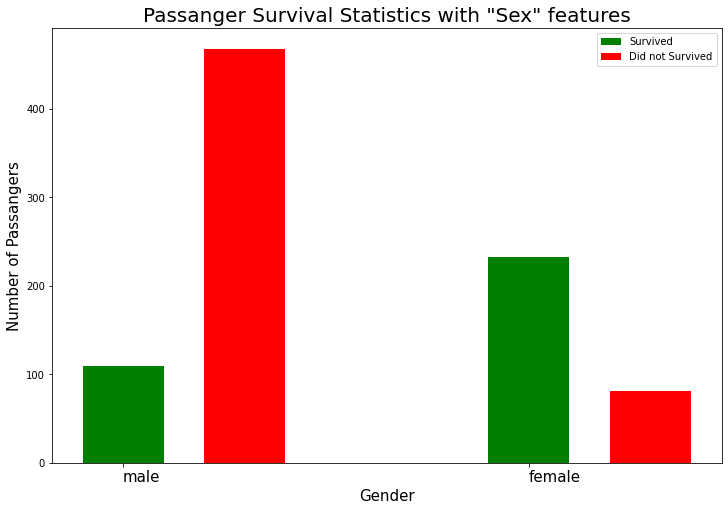

In [ ]:
not_survived = [ss['male'][0],ss['female'][0]]
survived = [ss['male'][1],ss['female'][1]]

label = ['male','female']

index = np.arange(len(label))
plt.figure(figsize=(12, 8))
plt.bar(index, survived, width = 0.2, color='green')
plt.bar(index + 0.3, not_survived, width = 0.2, color='red')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Number of Passangers', fontsize=15)
plt.xticks(index, label, fontsize=15, rotation=60, horizontalalignment='left' )
plt.title('Passanger Survival Statistics with "Sex" features', fontsize=20)
plt.legend(['Survived','Did not Survived'])


In [ ]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for index, passenger in data.iterrows():
        
        if passenger['Sex'] == "male" :
            predictions.append(0)
        else:
            predictions.append(1)
        
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [ ]:
print(accuracy_score(target,predictions))

Predictions have an accuracy of 78.68%.


### Further improvement
***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  


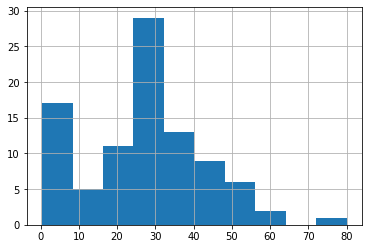

In [ ]:
df[(df.Sex == 'male') & (df.Survived == 1) ].Age.hist(bins = 10)

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older did not survive the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.

In [ ]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == "male" :
            if passenger['Age'] < 5:
                predictions.append(1)
            else:
                predictions.append(0)
        else:
            predictions.append(1)
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)
print(accuracy_score(target, predictions))

Predictions have an accuracy of 79.46%.
